<a href="https://colab.research.google.com/github/d823944/ML100-Days/blob/master/Homework/Day76_Optimizer_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業: 
    
    (1)以Adam為例, 調整 batch_size, epoch, 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
def plot_loss_acc(history_dict, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    ax1.plot(epochs, loss_values, 'k:', label='training loss')
    ax1.plot(epochs, val_loss_values, 'b--', label='validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title(title)

    ax2.plot(epochs, acc_values, 'k:', label='training accuracy')
    ax2.plot(epochs, val_acc_values, 'b--', label='validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title(title)
    plt.tight_layout()
    plt.show()

In [0]:
def build_model(n_hidden_layers=1):
    #  第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()

    #  第二步：構建網絡層
    model.add(Dense(32, activation='relu', input_shape=(784,))) # 輸入層，28*28=784
    for i in range(n_hidden_layers):
        model.add(Dense(32, activation='relu')) # 隱藏層節點500個   
    
    model.add(Dense(10, activation='softmax')) # 輸出結果是10個類別，所以維度是10

    #  模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())

    #  輸出模型摘要資訊
    model.summary()
    return model

In [0]:
#  第四步：資料分割
#  使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

... optimizer=adam, batch_size=512, epochs=20
Total Parameters：26506
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


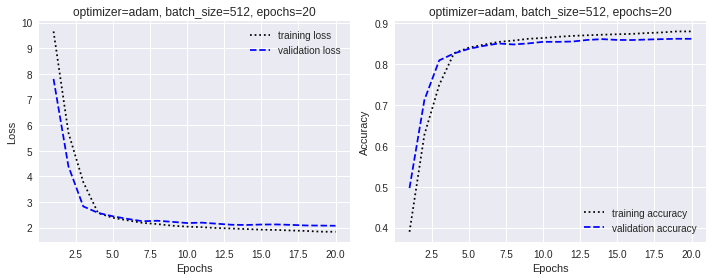

... optimizer=sgd, batch_size=512, epochs=20
Total Parameters：26506
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


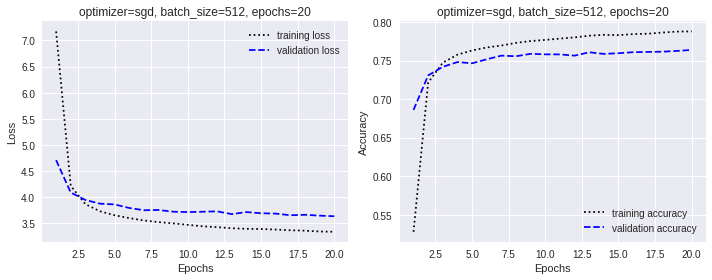

... optimizer=rmsprop, batch_size=512, epochs=20
Total Parameters：26506
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


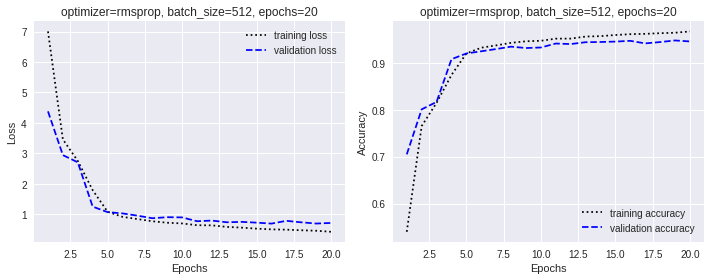

In [11]:
#  第三步：編譯
for optimizer in ['adam', 'sgd', 'rmsprop']:
    for batch_size in [512]:
        for epochs in [20]:
            title = f"optimizer={optimizer}, batch_size={batch_size}, epochs={epochs}"
            print(f"... {title}")
            
            model = build_model(n_hidden_layers=1)
            model.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

            history = model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs, 
                                verbose=0,
                                validation_split=0.25)

            
            plot_loss_acc(history.history, title=title)


... optimizer=rmsprop, batch_size=128, epochs=10
Total Parameters：28618
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


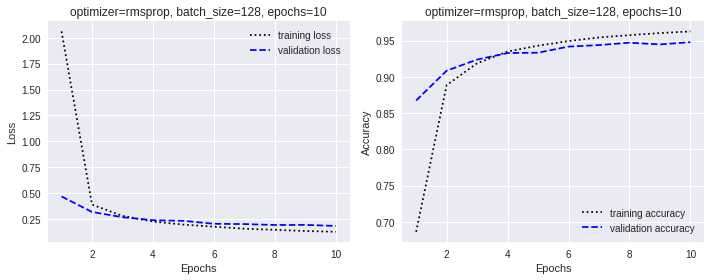

... optimizer=rmsprop, batch_size=256, epochs=10
Total Parameters：28618
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


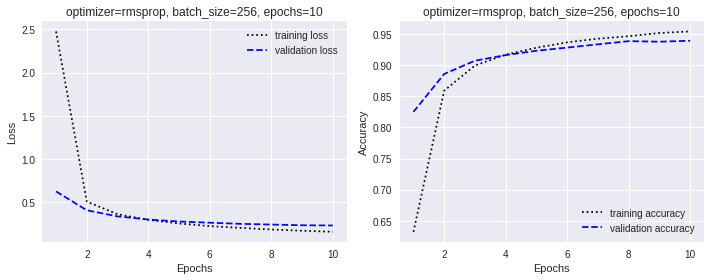

... optimizer=rmsprop, batch_size=512, epochs=10
Total Parameters：28618
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


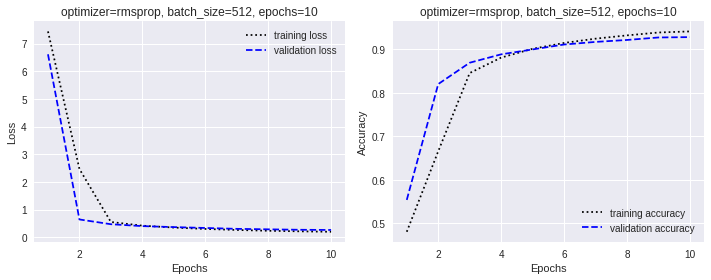

In [26]:
for optimizer in ['rmsprop']:
    for batch_size in [128, 256, 512]:
        for epochs in [10]:
            title = f"optimizer={optimizer}, batch_size={batch_size}, epochs={epochs}"
            print(f"... {title}")
            
            model = build_model(n_hidden_layers=3)
            model.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

            history = model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs, 
                                verbose=0,
                                validation_split=0.25)

            
            plot_loss_acc(history.history, title=title)

In [27]:
#  第六步：輸出
model = build_model(n_hidden_layers=3)
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, Y_train,
        batch_size=128,
        epochs=8, 
        verbose=0)

evaluation = model.evaluate(X_test, Y_test)

print(f"loss = {evaluation[0]:.3f}, accuracy={evaluation[1]:.3f}")


Total Parameters：28618
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_58 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 1s 102us/step
loss = 0.198, accuracy=0.947


In [28]:
predictions = model.predict(X_test)

pred_max = np.argmax(predictions, axis=1)

sum(pred_max == y_test) / len(y_test)

0.9472